## Table of Contents (ToC) <a class="anchor" id="TOC"></a>
* [Time-series Forecasting](#TSF)
 * [Loading basic dependencies](#TSF-lib)
 * [Loading Data](#TSF-data)
 * [Missing Values](#TSF-miss)
 * [Linear Imputation/Interpolation](#TSF-impute)
 * [Outliers](#TSF-outlier)
 * [Augmented Dickey-Fuller Test for Stationarity](#TSF-ADF)
 * [Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test](#TSF-KPSS)
 * [Converting Non Stationary to Stationary](#TSF-convert)
   * [BOX COX Transformation](#TSF-BoxCox)
   * [Differencing](#TSF-Diff)
   * [ADF Test](#TSF-ADFTest)
   * [KPSS Test](#TSF-KPSSTest)
 * [Auto Correleation Function (ACF)](#TSF-ACF)
 * [Partial Auto Correleation Function (PCF)](#TSF-PACF)

# Time-series Forecasting ([ToC](#TOC))<a class="anchor" id="TSF"></a>

## Loading basic dependencies ([ToC](#TOC))<a class="anchor" id="TSF-lib"></a>

In [4]:
#loading basic dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Loading Data ([ToC](#TOC))<a class="anchor" id="TSF-data"></a>

In [6]:
#loading the data
data = pd.read_csv('/kaggle/input/shop-customers/Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#shape of the data
data.shape

(144, 1)

## Missing Values ([ToC](#TOC))<a class="anchor" id="TSF-miss"></a>

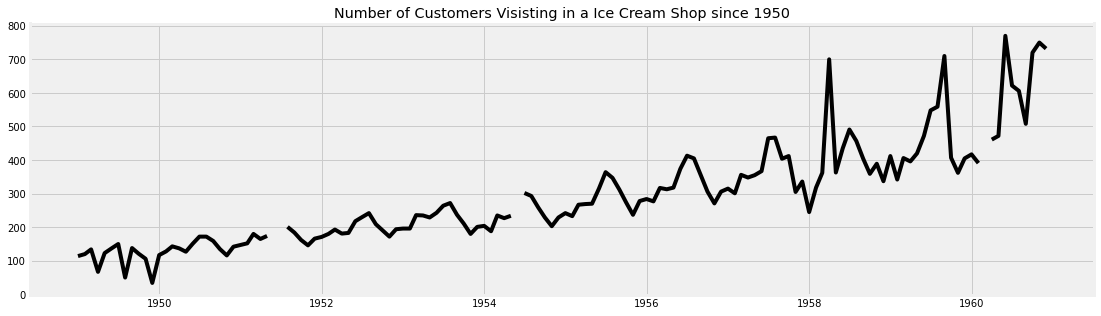

In [ ]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## Linear Imputation/Interpolation ([ToC](#TOC))<a class="anchor" id="TSF-impute"></a>



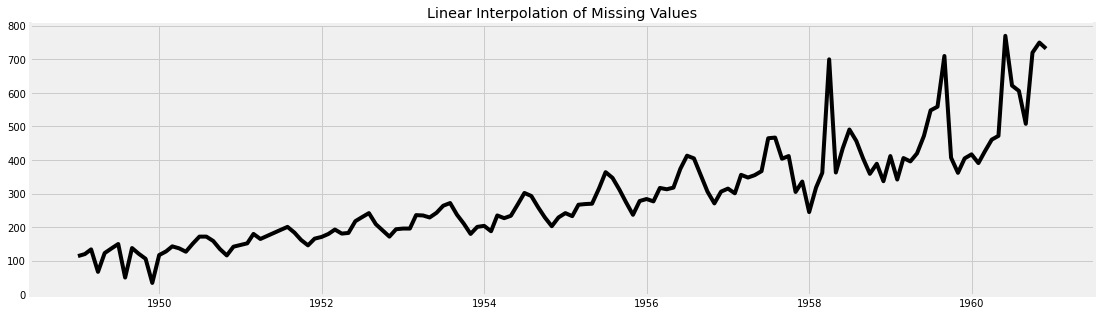

In [ ]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Outliers Treatment ([ToC](#TOC))<a class="anchor" id="TSF-outlier"></a>

In [ ]:
data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622

In [ ]:
#getting statistical information
data.describe()

,Customers,Customers_linear
count,140.000000,144.000000
mean,291.878571,291.194444
std,150.040592,148.877256
min,34.000000,34.000000
25%,180.000000,180.750000
50%,265.500000,265.500000
75%,364.750000,364.750000
max,770.000000,770.000000


## Stationarity Test ([ToC](#TOC))<a class="anchor" id="TSF-StationTestBefore"></a>

### Augmented Dickey-Fuller Test for Stationarity ([ToC](#TOC))<a class="anchor" id="TSF-ADF"></a>
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.




In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.9806738090828993

n_lags: 1.0

p-value: 1.0

Critial Values:

   1%, -3.482087964046026

Critial Values:

   5%, -2.8842185101614626

Critial Values:

   10%, -2.578864381347275


* p-value is 1 and its value is larger than 0.05 , hence 
it fails to reject the null hypothesis. Hence, the data has a unit root and is non-stationary

* The mean value is not stationary.
* The variance is fluctating over time.




### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test ([ToC](#TOC))<a class="anchor" id="TSF-KPSS"></a>
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test, 
* The Null Hypothesis : The series is stationary
when p-value >0.05
* Alternate Hypothesis: The series is not stationary
when p-value <= 0.5


In [ ]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  



KPSS Statistic: 1.0606088884543792

p-value: 0.01

num lags: 14

Critial Values:

Critial Values:

   10%, 0.347

Critial Values:

   5%, 0.463

Critial Values:

   2.5%, 0.574

Critial Values:

   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value

  warn("p-value is smaller than the indicated p-value", InterpolationWarning)



We see that our p-value is less than 0.5 and hence it violates the Null Hypothesis, hence it is non-stationary 

## Converting Non Stationary to Stationary ([ToC](#TOC))<a class="anchor" id="TSF-convert"></a>

### BOX COX Transformation ([ToC](#TOC))<a class="anchor" id="TSF-BoxCox"></a>
* A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 
* Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.
* It is just a log transformation.

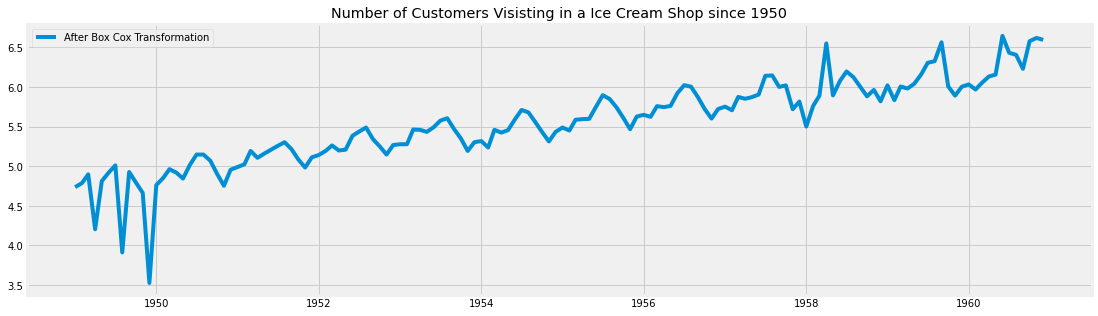

In [ ]:
from scipy.stats import boxcox
data_boxcox=pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend(loc='best')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

### Differencing ([ToC](#TOC))<a class="anchor" id="TSF-Diff"></a>

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

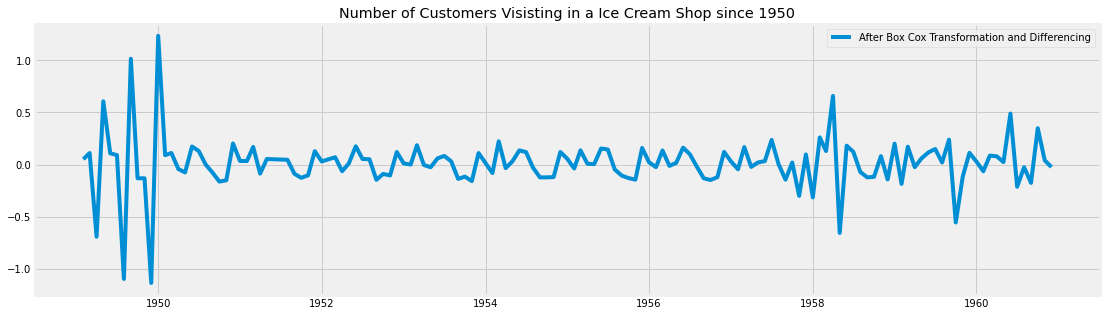

In [ ]:
data_boxcox_difference= pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## Stationarity Test after Conversion ([ToC](#TOC))<a class="anchor" id="TSF-StationTestAfter"></a>

### ADF Test ([ToC](#TOC))<a class="anchor" id="TSF-ADFTest"></a>

Checking stationary after transformation

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]:.20f}')
print(f'p-value: {result[1]:.20f}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.526510513706793

n_lags: 0.00000000000000000094

p-value: 0.00000000000000000094

Critial Values:

   1%, -3.4808880719210005

Critial Values:

   5%, -2.8836966192225284

Critial Values:

   10%, -2.5785857598714417


p-value is less than 0.05 hence it rejects the Null Hypothesis, hence it is stationary 

### KPSS Test ([ToC](#TOC))<a class="anchor" id="TSF-KPSSTest"></a>

Checking stationarity after transformation using KPSS

In [ ]:
from statsmodels.tsa.stattools import kpss
result = kpss(data_boxcox_difference)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

KPSS Statistic: 0.07116934656329456

p-value: 0.1

num lags: 14

Critial Values:

Critial Values:

   10%, 0.347

Critial Values:

   5%, 0.463

Critial Values:

   2.5%, 0.574

Critial Values:

   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value

  warn("p-value is greater than the indicated p-value", InterpolationWarning)


We see that our p-value is greater than  0.05 and hence it accepts the Null Hypothesis, hence it is stationary 

## Auto Correleation Function (ACF) ([ToC](#TOC))<a class="anchor" id="TSF-ACF"></a>
* Autocorrelation is the representation of the degree of similarity between a given time series and the lagged version of itself over successive time intervals.
* It helps us to know a variable is influenced by its own lagged values.
* ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 
* Any correlation value outside the band is considered a significant correlation

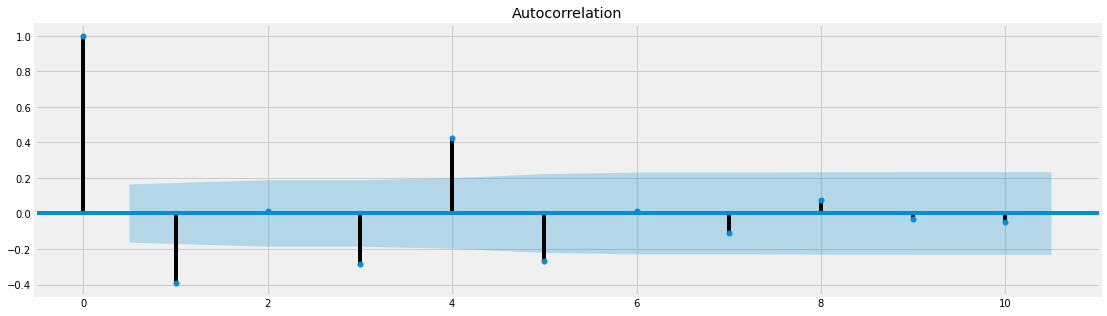

In [ ]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax=plt.gca(), lags=10)
plt.show()

## Partial Auto Correleation Function (PACF) ([ToC](#TOC))<a class="anchor" id="TSF-PACF"></a>
Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

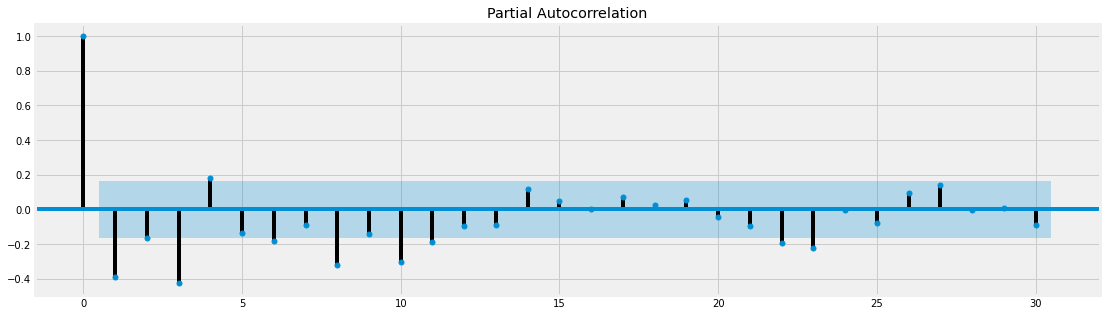

In [ ]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

## Splitting the Train and Test data

In [18]:
length_train = 115 # 115/140

train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]
train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1] # Because it cannot compute the difference for the first row
test_data_boxcox_difference = data_boxcox_difference[length_train-1:] # Because it cannot compute the difference for the first row

# (Simple) Auto Regressive Model
Regressive model is forecasting the future observations as a linear regression of one or more past observations.

This model has a parameter called “p” which is the lag order p that means p is the maximum number of lags that we consider in order to forecast the future observations.

Suppose, the highest order lag is 10.
2nd, 4th and 6th have significant correlation with future observations (known by plotting partial ACF).
Autoregressive model equation would be

y(t) = β_0 + β_1 y(t-2) + β_2 y(t-4) + β_3 y(t-6)

y(t-2), y(t-4) and y(t-6) are the independent variables.

In [19]:
from statsmodels.tsa.arima_model import ARIMA # Auto Regressive, Inverse, Moving Average 

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0)) # (p(AR),d(I),q(MA))
model_fit = model_ar.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

  % freq, ValueWarning)


const      0.012440

ar.L1.y   -0.398536

dtype: float64


## Recover Original Time Series

In [20]:
y_ar_new = data_boxcox_difference.copy()
y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())

y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox'])

## Plotting Train, Test and Forecast
* It is not capturing the seasonality, but it captured the trend

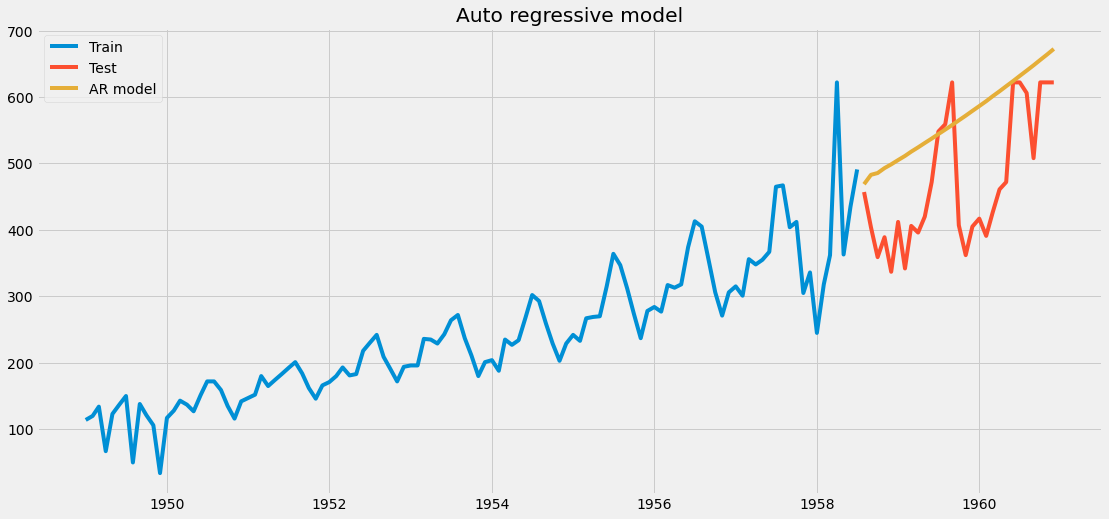

In [21]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'AR model')

plt.legend()
plt.title('Auto regressive model')
plt.show()

# Moving Average Method
In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

The mathematical equation is:-

y(t) = µ + φ(k)*ε(t-k)

µ is the mean of the series

ε(t-k) is the past forecasted value

φ(k) is the weight associated with error value


In [22]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7)) # q=7
model_fit = model_ma.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

  % freq, ValueWarning)


const      0.012553

ma.L1.y   -0.539879

ma.L2.y   -0.200034

ma.L3.y   -0.146816

ma.L4.y    0.627896

ma.L5.y   -0.310058

ma.L6.y   -0.113329

ma.L7.y   -0.317780

dtype: float64


## Recover Original Series

In [23]:
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

## Plotting Train, Test and Forecast

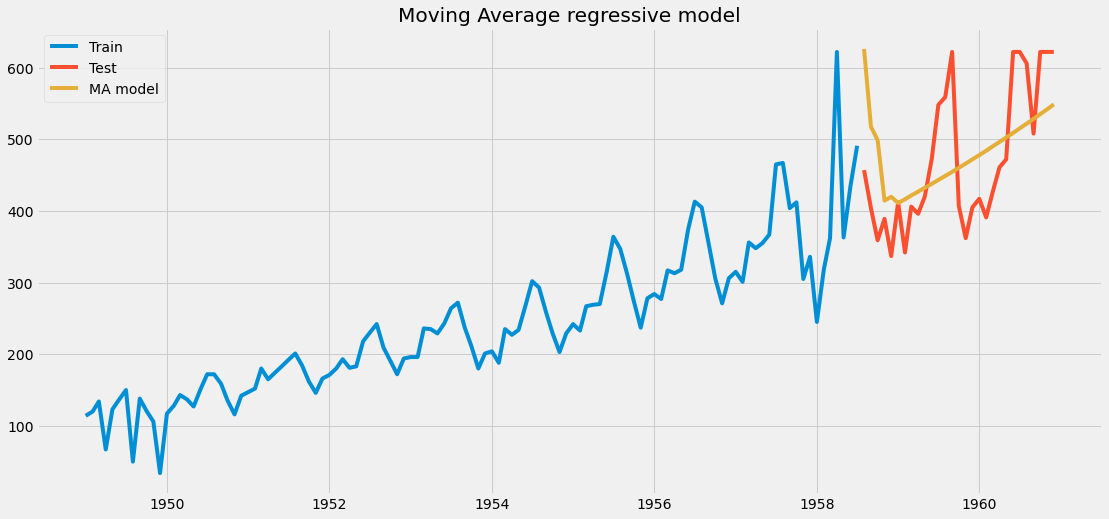

In [24]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

# Auto Regressive Moving Average Model (ARMA)
* ARMA Model combines both AR and MA model.
* It takes into account one or more past observations as well as the past errors.
* The ARMA model contains two parameters p and q, which can be determined using ACF & PACF
* p is the highest lag in the time series
* q is the number of past errors included
* Equation for ARMA Model (p=q=1):
 * y(t) = ß0 + ß1*y(t-1) + Ψ1𝛆(t-1)
   * y(t) is the Future Observation
   * ß0 is the Intercept
   * y(t-1) is the lag value
   * ß1 is the weight associated
   * Ψ1 is the weight associated with error
   * 𝛆(t-1) is the error Value.

In [39]:
from statsmodels.tsa.arima_model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5))
model_fit = model_arma.fit()
print(model_fit.params)

const      0.024012
ar.L1.y   -0.624300
ma.L1.y    1.048754
ma.L2.y   -0.630219
ma.L3.y   -1.266233
ma.L4.y   -0.347308
ma.L5.y    0.195173
dtype: float64


# Recover Original Time Series Data

In [40]:
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

# Plotting Train, Test and Forecast
* It is not capturing the seasonality, but it captured the trend

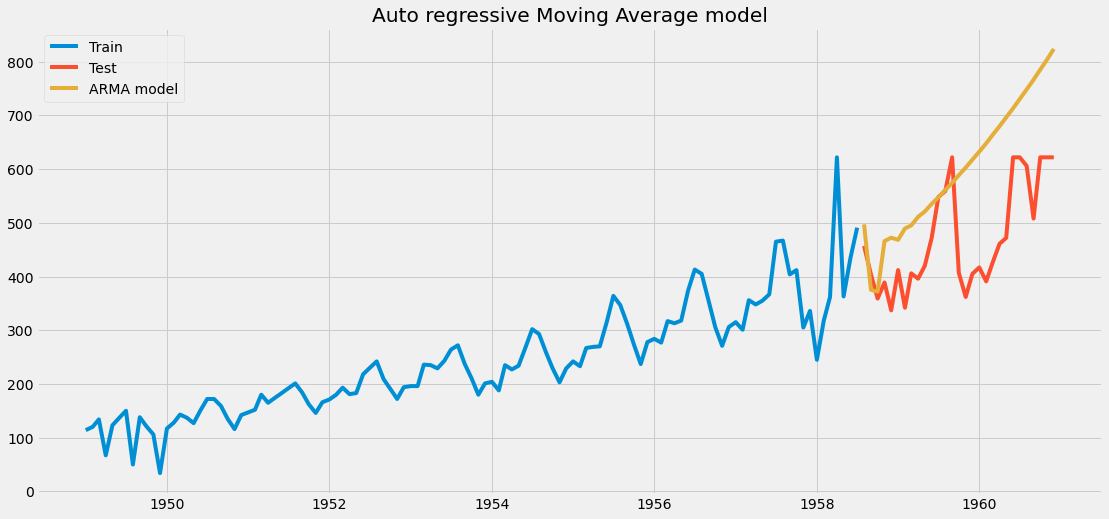

In [41]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

# Auto Regressive Integrated Moving Average Model (ARIMA)

* It transform the time series using Box Cox and then itself takes care of the differencing and remove the trend from the time series (We do not need to do differencing).
* We have three parameters to be used:-
 * p is the highest lag in the model (determined using ACF & PACF)
 * d is the degree of differencing to make the series stationary (determined using stationary tests, e.g., ADF, and KPSS, to make sure the time-series is converted to stationary)
 * q is the number of past errors terms included (determined using ACF & PACF)
* The mathematical equation for ARIMA Model
 * ▲y(t) = θ1 *▲y(t-1) + φ1*𝛆(t-1) + 𝛆(t)
   * Where, ▲y(t-1) = ▲y(t+1) - y(t)  
   * θ1 is the weight associated 
   * 𝛆(t-1) is the error term
   * φ1 is the weight associated with error term

In [12]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox, order=(5,1,2))
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.013211
ar.L1.D.y    1.023382
ar.L2.D.y   -0.305348
ar.L3.D.y   -0.293684
ar.L4.D.y    0.548231
ar.L5.D.y   -0.631379
ma.L1.D.y   -1.888935
ma.L2.D.y    1.000000
dtype: float64


C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Recover Time Series Data

In [13]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

# Plotting Train, Test and Forecast
* It is not capturing the seasonality

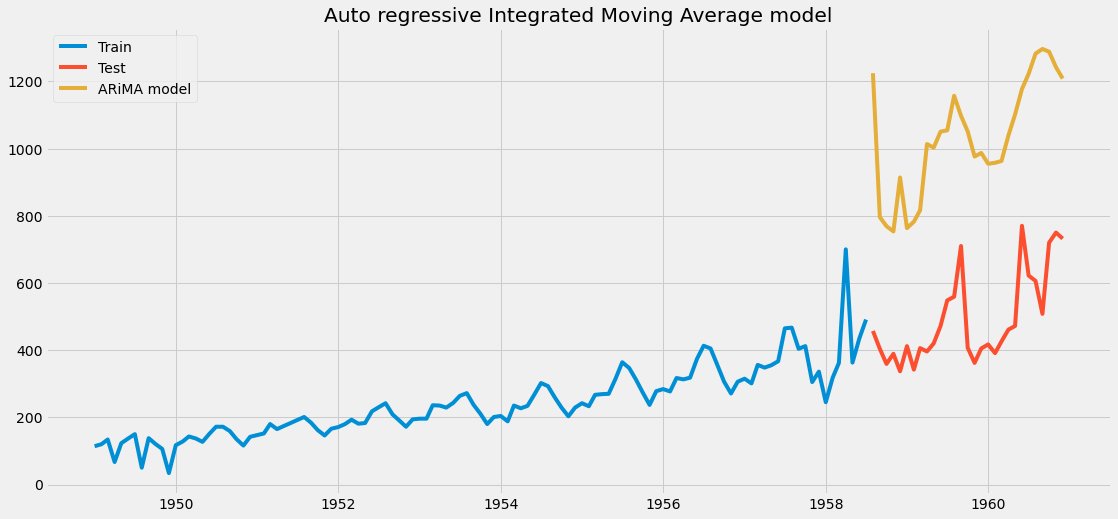

In [14]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

# Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)

SARIMA model brings all the features of ARIMA model along with the seasonality.

The key elements performed in SARIMA are:-

1. The time series is differenced to make it stationary.

2. The SARIMA equation is a linear combination of past observations and past errors.

3. Seasonal differencing is performed on the time series.

4. SARIMA models future seasonality as a linear combination of past seasonality observations and past seasonality errors.


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox_difference, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params)

C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\SYS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1     -0.570245
ma.L1     -0.998473
ar.S.L6   -0.736076
ma.S.L6   -0.521615
sigma2     0.052073
dtype: float64


# Recover Original Time Series Data

In [19]:
y_sarima_new = data_boxcox_difference.copy()
y_sarima_new['sarima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                      data_boxcox_difference.index.max())
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox_difference'].cumsum()
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox'].add(data_boxcox[0])
y_sarima_new['sarima_forecast'] = np.exp(y_sarima_new['sarima_forecast_boxcox'])

# Plotting Train, Test and Forecasted data

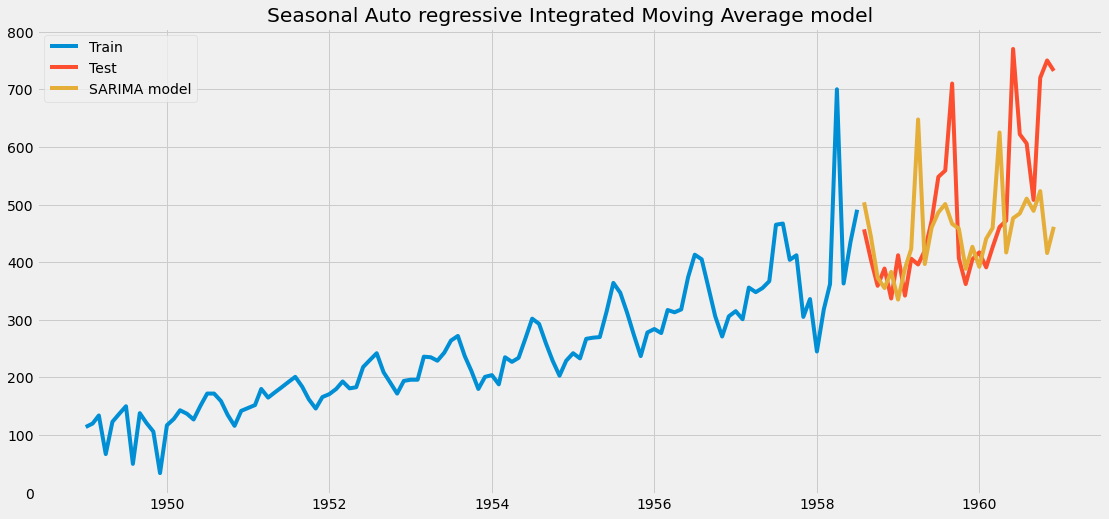

In [20]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_sarima_new['sarima_forecast'][test.index.min():], label = 'SARIMA model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average model')
plt.show()